In [1]:
# import library
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Check dataset

In [2]:
# Load Data
coffee_sale = pd.read_excel("Coffee Shop Sales.xlsx")
coffee_sale.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [3]:
# Know about datatype and column
coffee_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [4]:
# check shape of dataframe
coffee_sale.shape

(149116, 11)

In [5]:
# Create column total_revenue for calculate the total amount of sale per transaction
coffee_sale["total_revenue"] = coffee_sale["transaction_qty"] * coffee_sale["unit_price"]
coffee_sale.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_revenue
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


In [6]:
# basic statistic
coffee_sale.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price,total_revenue
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219,4.686367
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000,3.000000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000,3.750000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000,6.000000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000,360.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723,4.227099


In [7]:
# check missing value
coffee_sale.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
total_revenue       0
dtype: int64

In [8]:
# check if there any blank space
coffee_sale.isin([" "]).sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
total_revenue       0
dtype: int64

In [9]:
# check duplicate value
coffee_sale.duplicated().sum()

0

In [10]:
# check if there are any weird negative value
coffee_sale[coffee_sale["total_revenue"] <= 0]

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_revenue


## Create and extract some date and time feature

In [11]:
# combine date and time column
coffee_sale['transaction_datetime'] = pd.to_datetime(
    coffee_sale['transaction_date'].astype(str) + ' ' + coffee_sale['transaction_time'].astype(str)
)

coffee_sale.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_revenue,transaction_datetime
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41


In [12]:
# Extract month (as number)
coffee_sale['month'] = coffee_sale['transaction_datetime'].dt.month

# If you want month name instead:
coffee_sale['month_name'] = coffee_sale['transaction_datetime'].dt.month_name()

# Extract day of week (0=Monday, 6=Sunday)
coffee_sale['day_of_week'] = coffee_sale['transaction_datetime'].dt.dayofweek

# Or day name (e.g., Monday, Tuesday, etc.)
coffee_sale['day_name'] = coffee_sale['transaction_datetime'].dt.day_name()

# Extract hour of day
coffee_sale['hour'] = coffee_sale['transaction_datetime'].dt.hour


In [13]:
# final dataframe
coffee_sale.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_revenue,transaction_datetime,month,month_name,day_of_week,day_name,hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11,1,January,6,Sunday,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56,1,January,6,Sunday,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04,1,January,6,Sunday,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24,1,January,6,Sunday,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41,1,January,6,Sunday,7


In [22]:
# save new dataset to csv
coffee_sale.to_csv("cleaned_coffee_shop_sales.csv", index=False)

# Maven Roasters Sales Analysis

### Executive Summary

An analysis of sales data from the first half of the year reveals that **Maven Roasters is on a strong growth trajectory**, having more than doubled its daily revenue. Success is consistently driven by a predictable weekday morning rush from a loyal customer base. The most significant opportunities for future growth lie in **capturing the untapped weekend market** and **optimizing the menu around its high-performing products**, such as Barista Espresso and Brewed Chai tea.

---

## Analysis

### Question 1: How have sales trended over time?

+ To understand the overall trend, we first look at the sales performance over the daily time

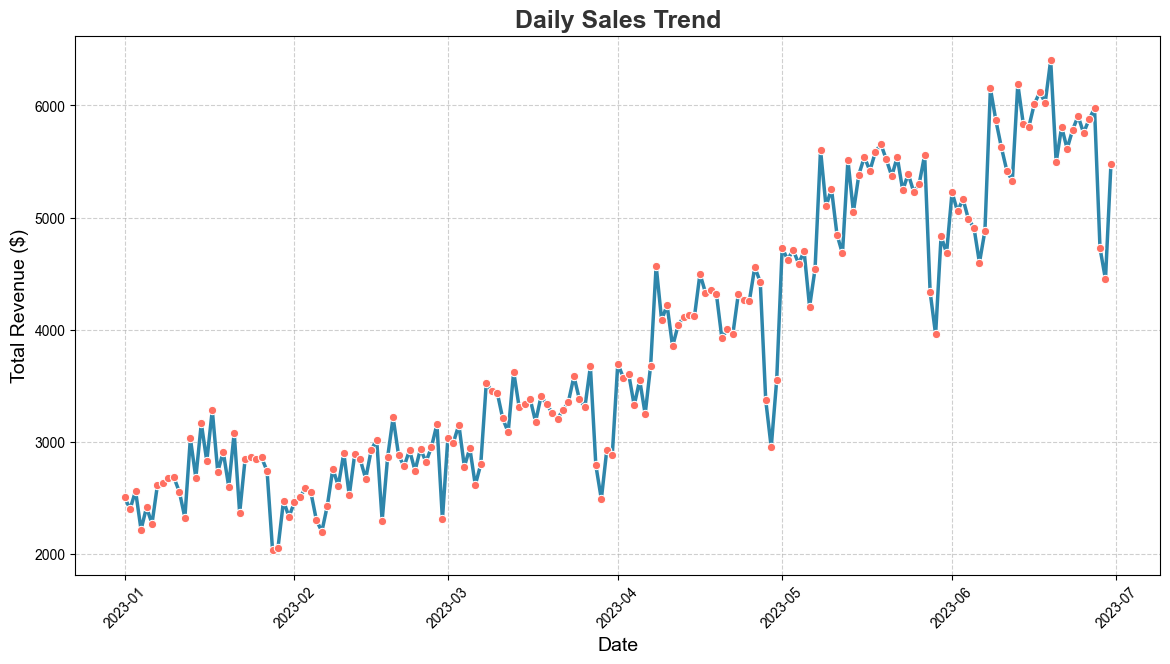

In [14]:
# Sales Trend Over Time
daily_sales = coffee_sale.groupby(coffee_sale['transaction_datetime'].dt.date)['total_revenue'].sum().reset_index()

plt.figure(figsize=(14, 7))

# A nicer, colorful lineplot with markers
sns.lineplot(
    data=daily_sales,
    x='transaction_datetime',
    y='total_revenue',
    color='#2E86AB',
    linewidth=2.5,
    marker='o',
    markersize=6,
    markerfacecolor='#FF6F61'
)

# Titles and labels with styling
plt.title('Daily Sales Trend', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)

# Grid for clarity
plt.grid(True, linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Light background style
sns.set_style("whitegrid")

plt.show()


**What** : This chart plots the total revenue for each day over a six-month period. It reveals significant daily volatility but confirms a clear overall upward trend, with daily revenue doubling from ~$2,500 in January to ~$5,500 in June.
<br>
<br>
**So What** : The consistent growth in daily sales reinforces the positive monthly trend, proving the business's expansion is not an anomaly. The daily fluctuations are expected and likely tied to weekly patterns.
<br>
<br>
**Now What** : To understand the daily volatility, the next step is to analyze the sales patterns within a typical week and a typical day.


+ Next, we examine the trend month-over-month

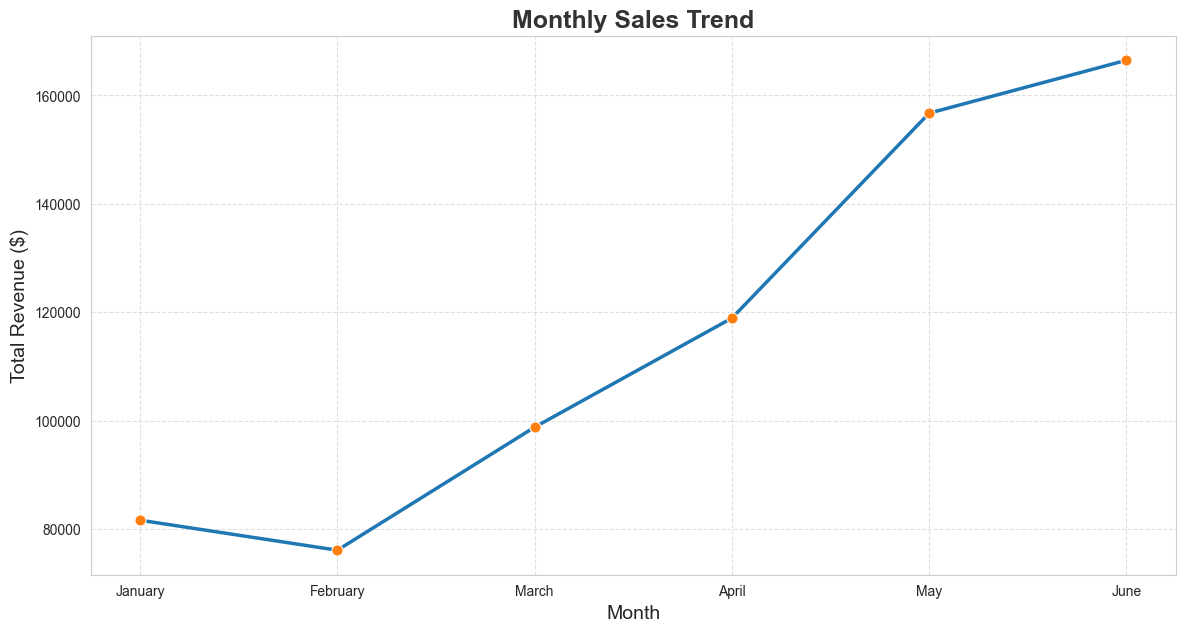

In [15]:
# Sales trend over time by monthly
monthly_sales = coffee_sale.groupby(coffee_sale['month_name'])['total_revenue'].sum().reset_index()

# Define month order (for proper sorting)
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
monthly_sales['month_name'] = pd.Categorical(monthly_sales['month_name'], categories=month_order, ordered=True)

plt.figure(figsize=(14, 7))

# Stylish line plot with markers
sns.lineplot(
    data=monthly_sales,
    x='month_name',
    y='total_revenue',
    color='#1f77b4',
    linewidth=2.5,
    marker='o',
    markersize=8,
    markerfacecolor='#ff7f0e'
)


# Titles and labels with better styling
plt.title('Monthly Sales Trend', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)

# Clean gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Light style
sns.set_style("whitegrid")

plt.show()


**What** : This chart displays the total sales revenue for each month from January to June. After a slight dip in February, the trend shows strong, accelerating growth month-over-month.
<br>
<br>
**So What** : This powerful upward trajectory indicates that the business is very healthy and rapidly gaining momentum. Strategies implemented in the early part of the year are likely paying off, leading to increased customer acquisition or higher transaction values.
<br>
<br>
**Now What** : The key is to identify the specific drivers of this growth. The business should analyze what changed around March (e.g., new marketing, popular products) to ensure this success can be sustained and replicated.


+ move to the performace over the weeks. 

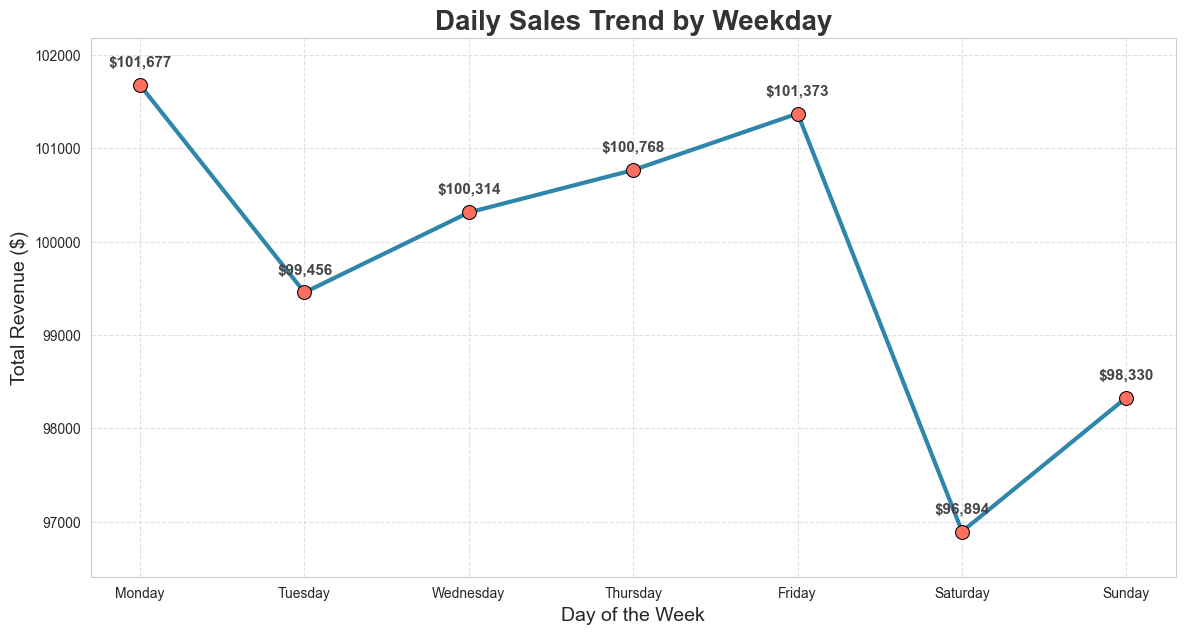

In [16]:
# Sales trend over time by daily
daily_sales = coffee_sale.groupby('day_name')['total_revenue'].sum().reset_index()

# Define correct day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales['day_name'] = pd.Categorical(daily_sales['day_name'], categories=day_order, ordered=True)

plt.figure(figsize=(14, 7))

# Line plot with markers
sns.lineplot(
    data=daily_sales,
    x='day_name',
    y='total_revenue',
    color='#2E86AB',
    linewidth=3,
    marker='o',
    markersize=10,
    markerfacecolor='#FF6F61',
    markeredgecolor='black'
)


# Add value labels
for i, row in daily_sales.iterrows():
    plt.text(
        row['day_name'],
        row['total_revenue'] + (daily_sales['total_revenue'].max() * 0.002),  # small offset
        f"${row['total_revenue']:,.0f}",
        ha='center',
        fontsize=11,
        fontweight='bold',
        color='#444444'
    )

# Titles and labels
plt.title('Daily Sales Trend by Weekday', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)

# Adjust y-axis to zoom in on data
min_revenue = daily_sales['total_revenue'].min()
max_revenue = daily_sales['total_revenue'].max()
plt.ylim(min_revenue * 0.995, max_revenue * 1.005)  # small margin for clarity

# Grid & style
plt.grid(True, linestyle='--', alpha=0.6)
sns.set_style("whitegrid")

plt.show()


**What** : This chart shows the total sales revenue for each day of the week. It highlights that weekdays are strong, peaking on Monday, while there is a dramatic drop on Saturday, the lowest-performing day.
<br>
<br>
**So What** : This trend suggests the primary customer base consists of first day of the week and weekday commuters and professionals. The business model is not currently capturing the weekend crowd, representing a significant untapped market.
<br>
<br>
**Now What** : This is a clear opportunity for a strategic initiative. The business should develop and launch weekend-specific promotions, events, or menu items to attract a different audience (like families or shoppers) and boost Saturday sales. 


+ finally we check the performace of time during the whole day

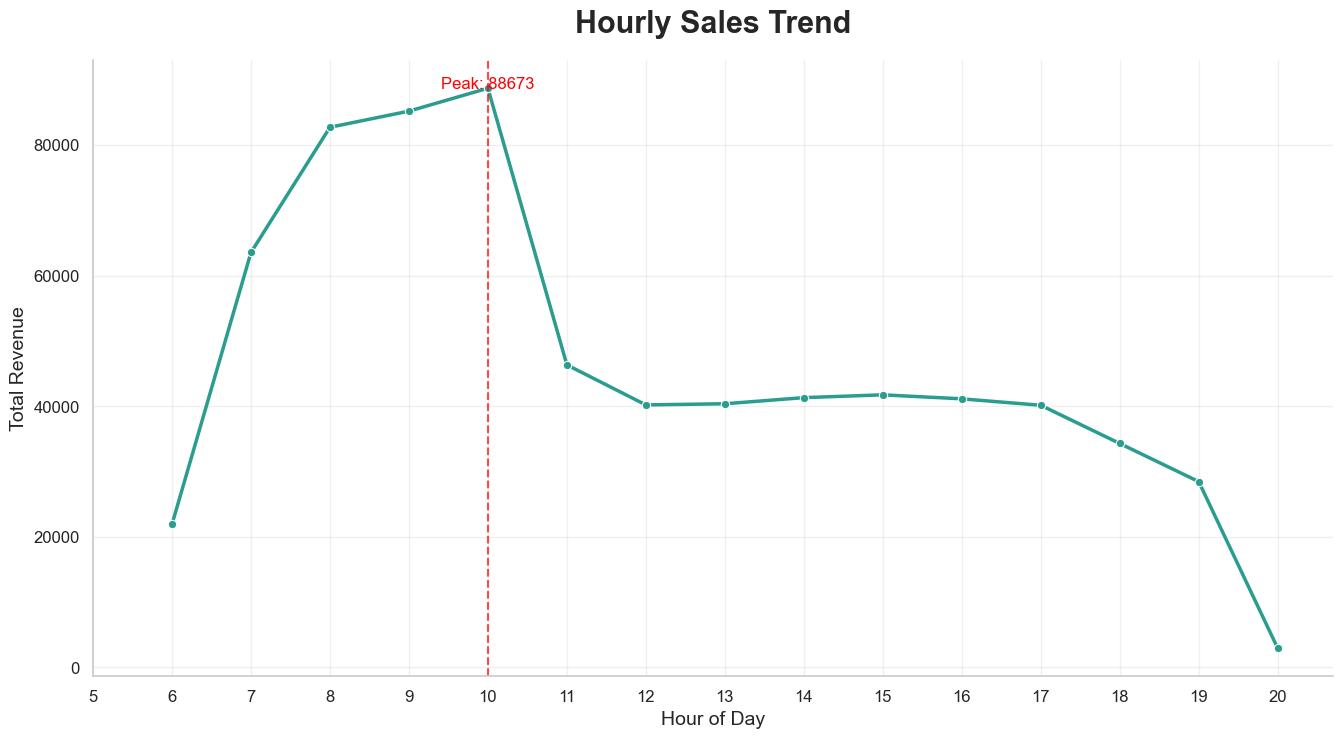

In [17]:
# Sales trend over time by hour (better design)
hourly_sales = coffee_sale.groupby('hour')['total_revenue'].sum().reset_index()

plt.figure(figsize=(16, 8))

# Use seaborn style for cleaner look
sns.set_theme(style="whitegrid")

# Lineplot with markers for each point
sns.lineplot(
    data=hourly_sales,
    x='hour',
    y='total_revenue',
    marker="o",
    linewidth=2.5,
    color="#2a9d8f"  # nice greenish-blue
)

# Title & labels
plt.title("Hourly Sales Trend", fontsize=22, fontweight="bold", pad=20)
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Total Revenue", fontsize=14)

# Make x-axis show all hours
plt.xticks(range(5, 21), fontsize=12)
plt.yticks(fontsize=12)

# Add light background grid
plt.grid(alpha=0.3)

# Add a line highlighting max sales
max_hour = hourly_sales.loc[hourly_sales['total_revenue'].idxmax()]
plt.axvline(x=max_hour['hour'], color="red", linestyle="--", alpha=0.7)
plt.text(max_hour['hour'], max_hour['total_revenue'] + 5,
         f"Peak: {max_hour['total_revenue']:.0f}",
         color="red", ha="center", fontsize=12)

# Remove top & right spines for modern look
sns.despine()

plt.show()


**What** : This chart aggregates sales revenue by the hour, showing a massive spike between 8 AM and 10 AM, a sharp drop, a stable afternoon plateau, and a gradual decline in the evening.
<br>
<br>
**So What** : This pattern clearly defines the customer behavior: the vast majority of business comes from the morning coffee rush. The morning window is the most critical period for revenue generation. ☕
<br>
<br>
**Now What** : Operations must be optimized to handle this peak demand. This means maximizing staffing, ensuring inventory is ready, and streamlining the ordering process between 8 AM and 11 AM to minimize wait times and capture every possible sale.



----
### Question 2: Which days of the week tend to be busiest, and why do you think that's the case?

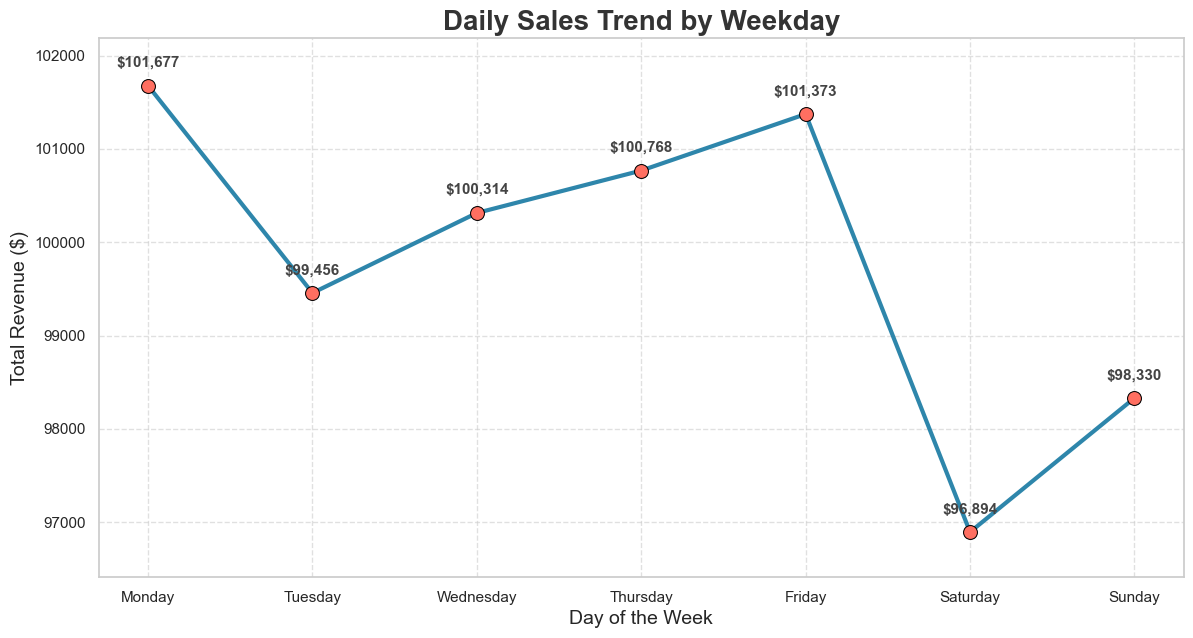

In [18]:
# Sales trend over time by daily
daily_sales = coffee_sale.groupby('day_name')['total_revenue'].sum().reset_index()

# Define correct day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales['day_name'] = pd.Categorical(daily_sales['day_name'], categories=day_order, ordered=True)

plt.figure(figsize=(14, 7))

# Line plot with markers
sns.lineplot(
    data=daily_sales,
    x='day_name',
    y='total_revenue',
    color='#2E86AB',
    linewidth=3,
    marker='o',
    markersize=10,
    markerfacecolor='#FF6F61',
    markeredgecolor='black'
)


# Add value labels
for i, row in daily_sales.iterrows():
    plt.text(
        row['day_name'],
        row['total_revenue'] + (daily_sales['total_revenue'].max() * 0.002),  # small offset
        f"${row['total_revenue']:,.0f}",
        ha='center',
        fontsize=11,
        fontweight='bold',
        color='#444444'
    )

# Titles and labels
plt.title('Daily Sales Trend by Weekday', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)

# Adjust y-axis to zoom in on data
min_revenue = daily_sales['total_revenue'].min()
max_revenue = daily_sales['total_revenue'].max()
plt.ylim(min_revenue * 0.995, max_revenue * 1.005)  # small margin for clarity

# Grid & style
plt.grid(True, linestyle='--', alpha=0.6)
sns.set_style("whitegrid")

plt.show()


### Based on this data, the pattern of sales activity is centered around the start of the work week.


+ **Busiest Period**: **Monday** is the busiest day by a clear margin. This is likely driven by a strong "back-to-work" rush. ☕ Customers are starting their week, catching up from the weekend, and need caffeine to get going. It represents the day of highest necessity.
<br>
<br> 

+ **Busiest Period**: **Friday** is the second-highest peak. This still supports the "end-of-week treat" theory, where customers are more relaxed and willing to spend, but it's not as strong as the initial Monday rush.
<br>
<br> 

+ **Busiest Period**: **Saturday** remains the slowest day by far. The reason for this is consistent: the regular weekday customers (commuters, office workers) are absent, indicating the business primarily serves a professional crowd.


----
### Question 3 - Which products are sold most and least often? Which drive the most revenue for the business?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7836\3495158278.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


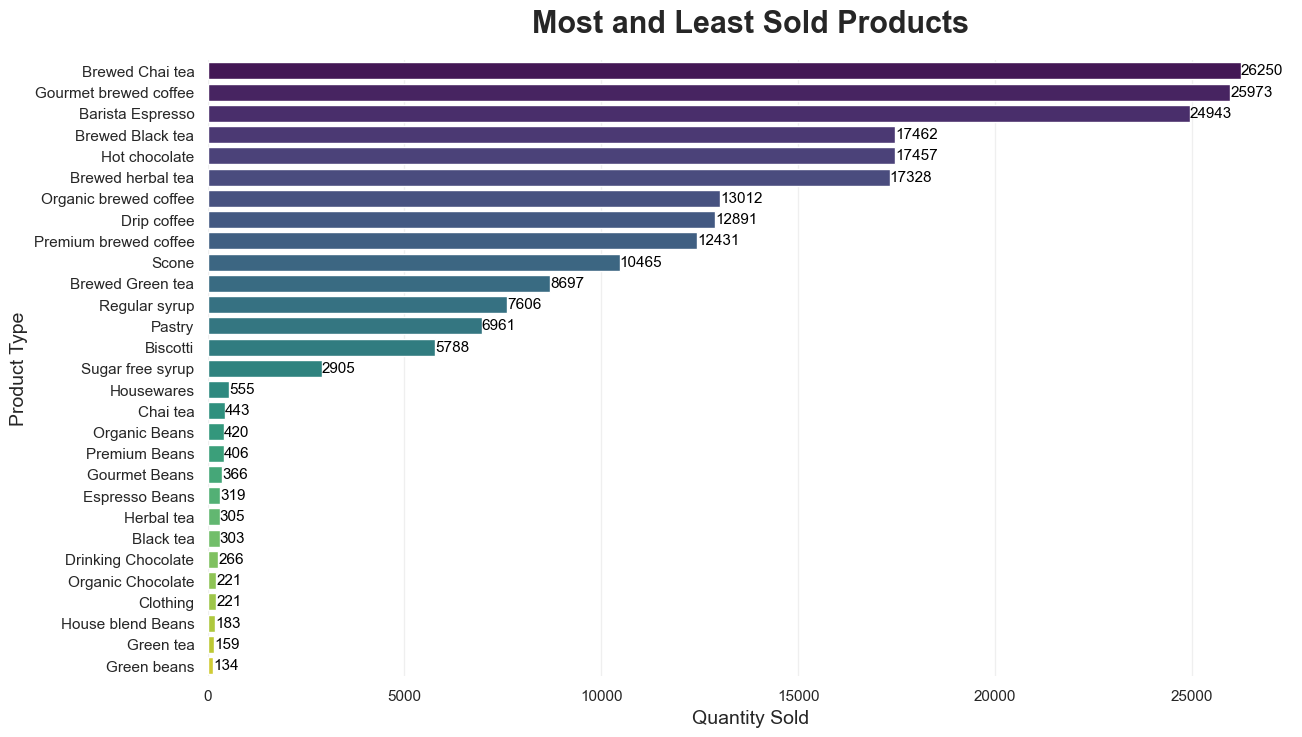

In [19]:
# Most and Least Sold Products (better design)
product_sales = coffee_sale.groupby('product_type')['transaction_qty'].sum().reset_index()
product_sales = product_sales.sort_values(by='transaction_qty', ascending=False)

plt.figure(figsize=(14, 8))

# Use seaborn style
sns.set_theme(style="whitegrid")

# Barplot with color palette
sns.barplot(
    data=product_sales,
    x='transaction_qty',
    y='product_type',
    palette="viridis"
)

# Title & labels
plt.title("Most and Least Sold Products", fontsize=22, fontweight="bold", pad=20)
plt.xlabel("Quantity Sold", fontsize=14)
plt.ylabel("Product Type", fontsize=14)

# Add values on bars
for index, value in enumerate(product_sales['transaction_qty']):
    plt.text(value + 1, index, str(value), va='center', fontsize=11, color="black")

# Grid lines only on x-axis
plt.grid(axis="x", alpha=0.3)

# Remove top & right spines
sns.despine(left=True, bottom=True)

plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7836\314054891.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


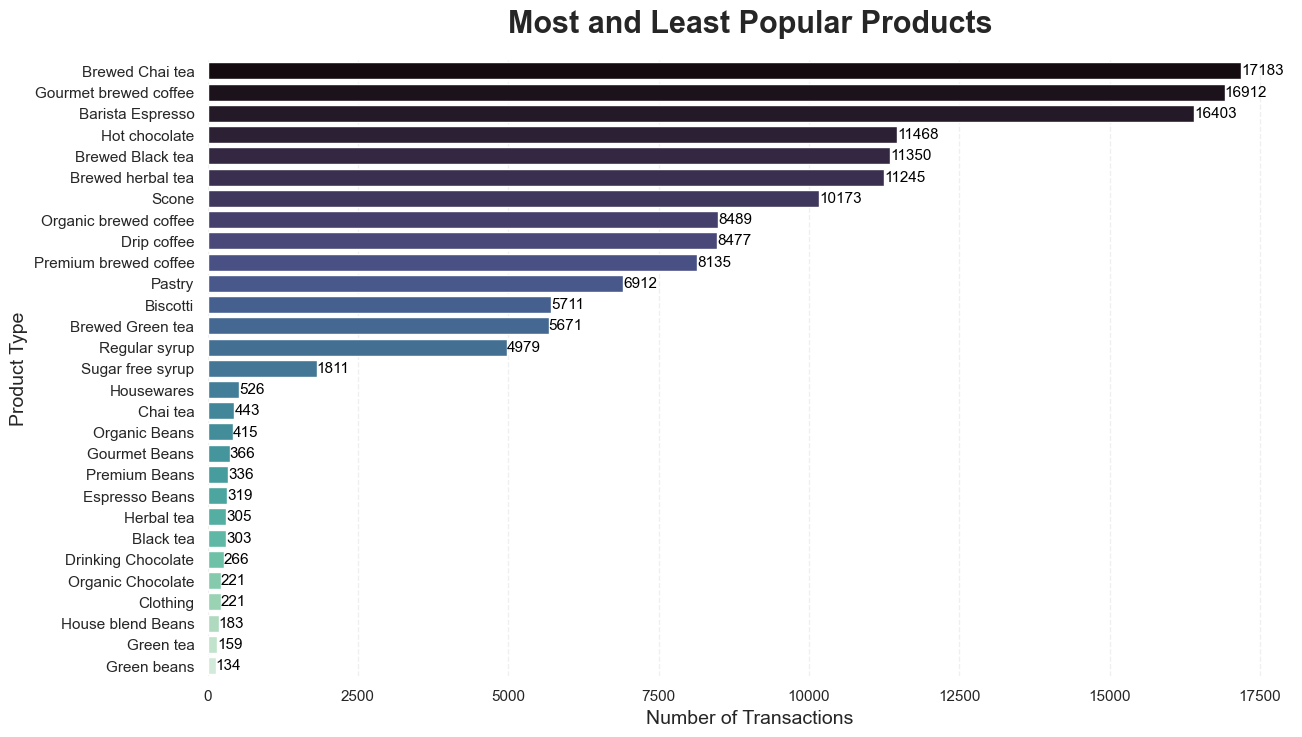

In [20]:
# Most and Least Popular Products (better design)
product_popularity = coffee_sale.groupby('product_type')['transaction_id'].nunique().reset_index()
product_popularity = product_popularity.sort_values(by='transaction_id', ascending=False)

plt.figure(figsize=(14, 8))

# Seaborn theme for clean look
sns.set_theme(style="whitegrid")

# Barplot with custom palette
sns.barplot(
    data=product_popularity,
    x='transaction_id',
    y='product_type',
    palette="mako"   # elegant gradient palette
)

# Title & labels
plt.title("Most and Least Popular Products", fontsize=22, fontweight="bold", pad=20)
plt.xlabel("Number of Transactions", fontsize=14)
plt.ylabel("Product Type", fontsize=14)

# Add values at the end of each bar
for index, value in enumerate(product_popularity['transaction_id']):
    plt.text(value + 1, index, str(value), va='center', fontsize=11, color="black")

# Light gridlines only on x-axis
plt.grid(axis="x", alpha=0.3, linestyle="--")

# Remove unnecessary spines
sns.despine(left=True, bottom=True)

plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7836\2269913900.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


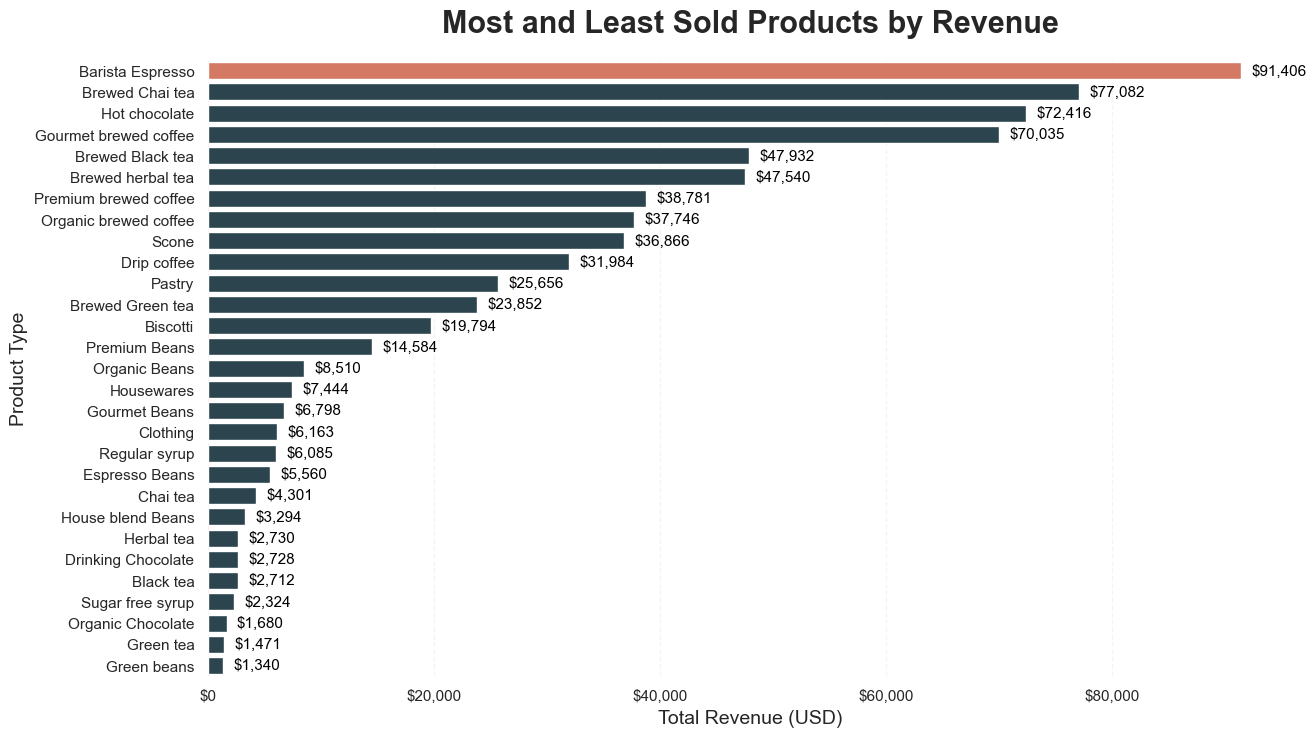

In [21]:
# Most and Least Sold Products by Revenue (unique design)
import matplotlib.ticker as mtick

product_revenue = coffee_sale.groupby('product_type')['total_revenue'].sum().reset_index()
product_revenue = product_revenue.sort_values(by='total_revenue', ascending=False)

plt.figure(figsize=(14, 8))

# Seaborn theme
sns.set_theme(style="whitegrid")

# Custom colors: highlight top product
colors = ["#e76f51" if i == 0 else "#264653" for i in range(len(product_revenue))]

# Barplot
sns.barplot(
    data=product_revenue,
    x='total_revenue',
    y='product_type',
    palette=colors
)

# Title & labels
plt.title("Most and Least Sold Products by Revenue", fontsize=22, fontweight="bold", pad=20)
plt.xlabel("Total Revenue (USD)", fontsize=14)
plt.ylabel("Product Type", fontsize=14)

# Format x-axis as currency
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Add value labels
for index, value in enumerate(product_revenue['total_revenue']):
    plt.text(value + (product_revenue['total_revenue'].max() * 0.01),  # slight offset
             index,
             f"${value:,.0f}",
             va='center', fontsize=11, color="black")

# Subtle grid
plt.grid(axis="x", alpha=0.2, linestyle="--")

# Clean look
sns.despine(left=True, bottom=True)

plt.show()


### Product Performance

Based on the analysis of product sales by revenue, quantity, and transaction frequency, we can draw several key conclusions:

* **Core Products:** **Barista Espresso** and **Brewed Chai tea** are the clear champions of the menu. They consistently rank in the top 3 across all metrics, making them vital to the business's success.

* **High-Value vs. High-Volume:** An important distinction is that **Barista Espresso** is the #1 product for **Total Revenue**, despite being #3 for **Quantity Sold**. This indicates it's a high-value item with a strong price point that significantly boosts profitability.

* **Underperforming Products:** Items such as **Green beans**, **Organic Chocolate**, and **Clothing** consistently rank at the bottom of all lists. They represent an opportunity for re-evaluation, whether through new marketing efforts or by removing them from the menu.

---
# Conclusion & Strategic Recommendations

### Conclusion

The analysis shows that Maven Roasters is a healthy, growing business with a strong and predictable customer base. Revenue has more than doubled in six months, driven by a core menu of popular products and a loyal weekday clientele. The following strategic recommendations are designed to build on these strengths and address key opportunities for even greater growth.

---

### 1. Target the Weekend Customer to Boost Sales

* **The Insight:** Sales drop dramatically on Saturdays, as the primary customer base of weekday commuters is absent. This is the single biggest area for improvement.
* **The Recommendation:** Launch a weekend-specific marketing campaign to attract a new audience (e.g., local residents, families, shoppers).
    * **Action Steps:** Introduce a "Saturday Special" like a pastry and coffee combo, a family-friendly bundle, or promote larger, shareable drinks.

### 2. Optimize the Morning Rush to Maximize Revenue

* **The Insight:** The hours between 8 AM and 11 AM are by far the most profitable. Any friction during this period results in lost sales.
* **The Recommendation:** Focus on increasing the speed and efficiency of the morning service.
    * **Action Steps:** Ensure maximum staff coverage during these peak hours. Consider implementing a dedicated pickup area for mobile or pre-orders to serve regulars faster.

### 3. Refine the Menu Based on Performance

* **The Insight:** A few "superstar" products drive the majority of sales, while a long tail of items contribute very little.
* **The Recommendation:** Make data-driven decisions to simplify and enhance the menu.
    * **Action Steps:**
        * Prominently feature the high-revenue **Barista Espresso** and **Brewed Chai tea**.
        * Review the bottom 5-10 underperforming products (like Green beans, Clothing). Consider removing them to reduce waste and simplify kitchen operations.

### 4. Understand and Sustain Growth

* **The Insight:** The business has experienced fantastic growth since March.
* **The Recommendation:** Investigate the reasons behind this recent success to ensure it can be replicated.
    * **Action Steps:** Analyze what business changes occurred before the growth spurt. Was it a new marketing effort, a local event, or a change in product offerings? Understanding what worked is key to future planning.